In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from datetime import date



In [2]:
years = []
starts = []
ends = []
f = open('triplog.dat')
for line in f:
    years.append(line.split(',')[1].strip())
    starts.append(line.split('-')[0])
    ends.append(line.split('-')[1].split(',')[0].strip())
f.close()
start_months = [st.split(' ')[0] for st in starts]

In [3]:
month_dict = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05',
             'Jun': '06', 'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10',
              'Nov': '11', 'Dec': '12'}

In [4]:
end_months = []
for end,start in zip(ends, start_months):
    if len(end) < 3:
        end_months.append(start)
    else:
        end_months.append(end.split(' ')[0])

In [5]:
on_trip = []
for i in range(len(start_months)):
    date_str1 = years[i]+'-'+month_dict[start_months[i]]+'-'+starts[i].split(' ')[1]
    date_str2 = years[i]+'-'+month_dict[end_months[i]]+'-'+ends[i].split(' ')[-1]
    on_trip.append(np.arange(date_str1, date_str2, dtype='datetime64[D]'))

In [6]:
on_trip = np.concatenate(on_trip)

In [7]:
today = date.today()

all_dates = np.arange(np.min(on_trip), today.strftime("%Y-%m-%d"), dtype='datetime64[D]')

In [8]:
inter, indx1, indx2 = np.intersect1d(all_dates, on_trip, return_indices=True)

In [9]:
y = np.zeros(all_dates.size)
y[indx1] = 1

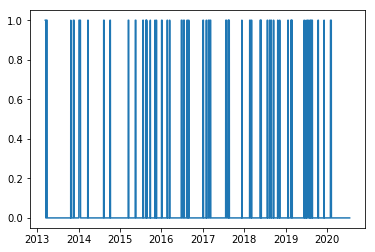

In [10]:
plt.plot(all_dates, y)

In [11]:
day = np.arange(y.size)

In [12]:
ot = np.where(y == 1)

In [13]:
gaps = day[ot][1:] -day[ot][:-1]

In [14]:
gaps[np.where(gaps > 1)]

array([  5, 209,  23,  43,  65, 137,  52, 158,  58,  62,  22,   3,  31,
        40,  11,  45,  45,  18, 102,  15,  24,  10, 124,  25,  16,   9,
       133,  15,   2, 111,  68,  10,  74,   3,  53,  17,  10,  18,  35,
        15,  71,  23,   3, 105,  16,  11,  14,   7,   8,  50,  50,  56])

In [15]:
np.max(gaps)

209

In [16]:
np.sum(y), np.sum(y)/np.size(y)

(246.0, 0.09158600148920328)

In [17]:
current_gap = np.size(y) - np.max(np.where(y == 1))
print('current days with no trip=', current_gap)

current days with no trip= 163


In [18]:
all_dates[ot][np.where(gaps > current_gap)[0]]

array(['2013-03-29'], dtype='datetime64[D]')

In [19]:
print('longest gap since', all_dates[ot][np.where(gaps > current_gap)][-1])

longest gap since 2013-03-29


In [25]:
on_trip

array(['2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
       '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
       '2019-12-06', '2019-12-07', '2019-10-14', '2019-10-15',
       '2019-10-16', '2019-10-17', '2019-08-23', '2019-08-24',
       '2019-08-25', '2019-08-11', '2019-08-12', '2019-08-13',
       '2019-08-14', '2019-08-15', '2019-08-03', '2019-08-04',
       '2019-07-12', '2019-07-13', '2019-07-14', '2019-07-15',
       '2019-07-16', '2019-07-17', '2019-07-18', '2019-07-19',
       '2019-07-20', '2019-07-01', '2019-06-13', '2019-06-14',
       '2019-06-15', '2019-02-25', '2019-02-26', '2019-02-27',
       '2019-02-28', '2019-02-16', '2019-02-17', '2019-02-18',
       '2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22',
       '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
       '2018-11-09', '2018-11-10', '2018-11-11', '2018-10-23',
       '2018-10-24', '2018-10-25', '2018-09-16', '2018-09-17',
       '2018-09-18', '2018-08-26', '2018-08-27', '2018-